In [5]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [6]:
# Carga de datos.
datos = datasets.load_boston()
# datos = datasets.fetch_california_housing()
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
# print(y)

Dimensiones de X:  (506, 13)


In [7]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

In [8]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(404, 13)


In [9]:
# 2) Extracción de características
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)

# 4) Selección de atributos

In [10]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True)

In [11]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
#print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

{'fit_time': array([0.10222936, 0.00199747, 0.0025084 , 0.00147295, 0.00125027]),
 'score_time': array([0.00383162, 0.        , 0.        , 0.0010221 , 0.00101185]),
 'test_MAE': array([-3.21076048, -3.49646957, -3.77356487, -3.92171483, -2.73953332]),
 'test_MAPE': array([-16.11181729, -16.67498664, -16.99058036, -18.78184408,
       -16.5622129 ]),
 'test_R2': array([0.6724828 , 0.76007223, 0.58945002, 0.75917498, 0.81121207]),
 'test_RMSE': array([-4.82560235, -4.85434331, -6.03941383, -5.07501498, -3.5370237 ])}


In [12]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]

Término independiente:  22.796534653465375


In [13]:
# ---- PREDICCIÓN ---- #

In [14]:
# 6) Extracción de las características de test
# 7) Selección de los atributos de test 
# 8) Estandarización de las característiacs de test
X_test_stdr = stdr_trained.transform(X_testing)

In [15]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [16]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
MAPE = metrics.mean_absolute_percentage_error(y_testing, y_pred_test)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)

MAE:  3.1891
MSE: 24.2911
RMSE: 4.9286
MAPE: 0.1687
R2:   0.6688


In [17]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

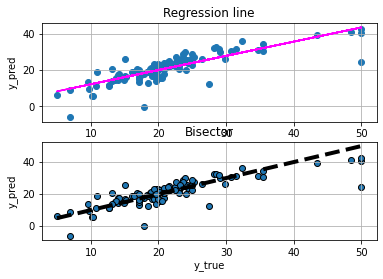

In [18]:
# Extraemos los resultados cualitativos del problema de regresión
report_regression_graphics(y_testing, y_pred_test)